# Required Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import pyswmm
from pyswmm import Simulation, LidControls, LidGroups, Subcatchments, Nodes
import os
import swmm
import swmmio as sio

# SUBBASIN DICTIONARIES (Dictionaries will be reference throughout the code)

In [2]:
#Subbasin LID Feasble Area Dictionaries
raingarden_feasible_areas = {'70151': 5808.493035, '70191': 5878.870933, '70231': 0.0, '70291': 4458.486032, '70311': 0.0, '70531': 6047.068894, '70571': 5793.221106, '70731': 24756.97, '70751': 0.0, '70771': 0.0, '70851': 9031.770973, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 22486.50283, '71231': 773.4261921, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 9100.057241, '71461': 43487.54768, '71491': 11928.8107, '71541': 35974.21977, '71611': 11351.63504, '71651': 30721.36677, '71661': 29955.18885, '71771': 11203.52403, '71911': 0.0, '71981': 2152.78, '71991': 20611.30848, '72021': 0.0, '72031': 5329.47602, '72051': 13666.5306, '72061': 0.0, '72071': 20636.12704, '72091': 3221.729454, '72121': 33794.66279, '72161': 11981.76905, '72191': 0.0, '72231': 3229.928489, '72241': 40557.9266, '72261': 141930.5727, '72311': 44415.64753, '72331': 16565.88793, '72371': 84103.34056, '72391': 12165.10336, '72411': 15545.60908, '72421': 14272.44135, '72551': 43580.20595, '72591': 55583.9368, '72631': 19815.3296, '72671': 44162.83417, '72731': 21000.83666, '72781': 23024.24035, '72901': 11161.08276, '72951': 43306.46711, '73001': 91815.73708, '73081': 13920.64411, '73121': 23892.97048, '73171': 0.0, '73181': 3385.30813, '73201': 9353.089577, '73211': 12806.63365, '73271': 10014.24695, '73301': 636.1767258, '73321': 671.0354007, '73341': 10877.37633, '73391': 9520.570522, '73401': 34881.08583, '73421': 0.0, '73461': 5787.304599, '73501': 379554.1623, '73531': 20854.9434, '73551': 11511.16521, '73571': 8611.12, '73601': 715484.6466, '73602': 315553.9121, '73631': 100553.3249, '73661': 32904.65401, '73671': 7756.228813, '73691': 3978.729612, '73751': 15212.84681, '73811': 4632.390388, '73841': 0.0, '73871': 0.0, '73911': 0.0}
permeablepavement_feasible_areas = {'70151': 12916.68, '70191': 0.0, '70231': 13993.0716, '70291': 0.0, '70311': 8611.118396, '70531': 0.0, '70571': 3229.17, '70731': 4305.56, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 988.7638887, '71191': 5204.229895, '71231': 15211.75947, '71251': 3352.216737, '71271': 5381.95, '71341': 0.0, '71361': 13993.07, '71391': 0.0, '71461': 26909.75, '71491': 3229.17, '71541': 5381.95, '71611': 0.0, '71651': 7534.73, '71661': 23680.58, '71771': 0.0, '71911': 3824.720936, '71981': 5381.95, '71991': 0.0, '72021': 0.0, '72031': 46862.92807, '72051': 0.0, '72061': 14329.82355, '72071': 0.0, '72091': 59543.3042, '72121': 0.0, '72161': 0.0, '72191': 15369.92325, '72231': 18733.53422, '72241': 0.0, '72261': 0.0, '72311': 0.0, '72331': 0.0, '72371': 0.0, '72391': 6953.536868, '72411': 581.1931315, '72421': 0.0, '72551': 0.0, '72591': 0.0, '72631': 3592.054222, '72671': 0.0, '72731': 9935.438827, '72781': 12553.53077, '72901': 0.0, '72951': 14386.89196, '73001': 0.0, '73081': 9687.51, '73121': 12827.45501, '73171': 9776.734992, '73181': 7534.73, '73201': 30138.92, '73211': 1076.39, '73271': 0.0, '73301': 17222.24, '73321': 6647.736192, '73341': 0.0, '73391': 1076.39, '73401': 0.0, '73421': 7345.333808, '73461': 25833.36, '73501': 0.0, '73531': 32600.9754, '73551': 0.0, '73571': 20832.98346, '73601': 10073.05113, '73602': 0.0, '73631': 0.0, '73661': 0.0, '73671': 0.0, '73691': 0.0, '73751': 0.0, '73811': 0.0, '73841': 0.0, '73871': 0.0, '73911': 0.0}
greenroof_feasible_areas = {'70151': 4886.247161, '70191': 1100.995048, '70231': 6954.042836, '70291': 1473.573669, '70311': 0.0, '70531': 1094.307599, '70571': 21527.8, '70731': 28152.0185, '70751': 15584.42482, '70771': 8611.12, '70851': 699.1804481, '70951': 2133.225406, '71051': 1076.39, '71171': 17221.8569, '71191': 6122.886662, '71231': 11430.39241, '71251': 8604.241362, '71271': 4312.438649, '71341': 16145.85, '71361': 7534.73, '71391': 9687.51, '71461': 18298.63, '71491': 14826.39563, '71541': 6458.34, '71611': 3229.17, '71651': 8854.184373, '71661': 2289.119013, '71771': 0.0, '71911': 8611.503098, '71981': 7398.390987, '71991': 1080.538838, '72021': 19375.02, '72031': 36357.55315, '72051': 1397.479236, '72061': 36597.26, '72071': 235.5580164, '72091': 57506.31142, '72121': 1541.026025, '72161': 1076.39, '72191': 33986.83858, '72231': 24752.26977, '72241': 1076.39, '72261': 59197.12939, '72311': 36569.90714, '72331': 151.8481564, '72371': 5230.101844, '72391': 5381.95, '72411': 7562.082857, '72421': 0.0, '72551': 2122.505014, '72591': 2152.78, '72631': 12921.38023, '72671': 1173.503467, '72731': 29062.53, '72781': 7534.73, '72901': 290.6647389, '72951': 9687.51, '73001': 3339.91685, '73081': 21384.84111, '73121': 9357.285313, '73171': 16289.43527, '73181': 6990.681118, '73201': 30615.11554, '73211': 1296.256317, '73271': 3229.17, '73301': 16630.5235, '73321': 26148.32693, '73341': 0.0, '73391': 0.0, '73401': 98283.16103, '73421': 20630.7033, '73461': 71257.33823, '73501': 173371.3127, '73531': 52908.96152, '73551': 10049.59107, '73571': 37450.83357, '73601': 216603.9892, '73602': 339062.85, '73631': 21574.91944, '73661': 0.0, '73671': 1076.39, '73691': 1086.235503, '73751': 962.4582949, '73811': 0.0, '73841': 0.0, '73871': 0.0, '73911': 0.0}
bioretention_feasible_areas = {'70151': 0.0, '70191': 0.0, '70231': 0.0, '70291': 0.0, '70311': 0.0, '70531': 0.0, '70571': 0.0, '70731': 1076.39, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 2152.78, '71231': 0.0, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 0.0, '71461': 3657.197829, '71491': 0.0, '71541': 0.0, '71611': 648.362171, '71651': 0.0, '71661': 2152.78, '71771': 0.0, '71911': 0.0, '71981': 0.0, '71991': 2152.78, '72021': 0.0, '72031': 0.0, '72051': 0.0, '72061': 0.0, '72071': 0.0, '72091': 0.0, '72121': 5381.95, '72161': 0.0, '72191': 0.0, '72231': 0.0, '72241': 0.0, '72261': 3229.17, '72311': 3229.17, '72331': 2152.78, '72371': 2135.260515, '72391': 0.0, '72411': 1076.39, '72421': 0.0, '72551': 1076.39, '72591': 1076.39, '72631': 1076.39, '72671': 1076.39, '72731': 3229.17, '72781': 7.996802699, '72901': 1076.39, '72951': 1068.393197, '73001': 9687.51, '73081': 0.0, '73121': 5381.95, '73171': 0.0, '73181': 0.0, '73201': 0.0, '73211': 0.0, '73271': 0.0, '73301': 0.0, '73321': 0.0, '73341': 0.0, '73391': 1076.39, '73401': 7534.73, '73421': 0.0, '73461': 0.0, '73501': 16145.85, '73531': 1076.39, '73551': 0.0, '73571': 4305.56, '73601': 60277.84, '73602': 15509.44566, '73631': 636.4043392, '73661': 1076.39, '73671': 1076.39, '73691': 0.0, '73751': 2152.78, '73811': 0.0, '73841': 0.0, '73871': 0.0, '73911': 0.0}

#Other LID Dictionaries
raingarden_standard_surfaceareas = {'70151': 462.3776362, '70191': 467.0917593, '70231': 840.705869, '70291': 784.3766702, '70311': 787.1700296, '70531': 650.094063, '70571': 827.6000257, '70731': 817.7622218, '70751': 743.322961, '70771': 714.4403333, '70851': 620.0892998, '70951': 708.8741905, '71051': 712.8089, '71171': 767.3702346, '71191': 768.7627391, '71231': 793.6335488, '71251': 826.8091737, '71271': 947.2587189, '71341': 891.3210318, '71361': 914.7547985, '71391': 768.3686325, '71461': 755.6719223, '71491': 1036.777212, '71541': 828.2117765, '71611': 774.8794467, '71651': 848.1305869, '71661': 842.8101964, '71771': 728.3889973, '71911': 636.5535417, '71981': 736.7114243, '71991': 636.8627533, '72021': 693.9283132, '72031': 1005.186301, '72051': 690.2868607, '72061': 939.0695416, '72071': 651.009286, '72091': 927.9296256, '72121': 671.1822722, '72161': 490.6427811, '72191': 996.6747647, '72231': 985.3918372, '72241': 652.1310005, '72261': 502.0339117, '72311': 561.7971065, '72331': 614.6306687, '72371': 670.6092428, '72391': 935.3757518, '72411': 485.0389775, '72421': 658.3894464, '72551': 659.3717009, '72591': 616.6014319, '72631': 871.622691, '72671': 699.6268099, '72731': 762.1321942, '72781': 695.4204566, '72901': 636.7826161, '72951': 567.673537, '73001': 687.3758136, '73081': 765.5796487, '73121': 816.0431198, '73171': 913.0600918, '73181': 1017.27915, '73201': 936.7333456, '73211': 598.6061559, '73271': 635.4530517, '73301': 950.2543445, '73321': 1105.661561, '73341': 582.0712076, '73391': 677.1456018, '73401': 926.3751007, '73421': 1137.466808, '73461': 1138.968494, '73501': 744.2595736, '73531': 1058.328457, '73551': 1058.44356, '73571': 1112.715481, '73601': 737.5084795, '73602': 760.8953714, '73631': 577.440625, '73661': 592.7719934, '73671': 626.3444165, '73691': 661.3178258, '73751': 561.2162905, '73811': 519.4571594, '73841': 764.5359175,'73871': 522.5, '73911': 689.3164856, '73931': 698.4997627, '73971': 615.3207012}
bioretention_standard_surfaceareas= {'70151': 2409.230841, '70191': 2433.793904, '70231': 4380.520054, '70291': 4087.015282, '70311': 4101.570154, '70531': 3387.332223, '70571': 4312.231713, '70731': 4260.971577, '70751': 3873.103849, '70771': 3722.610158, '70851': 3230.991615, '70951': 3693.607624, '71051': 3714.109532, '71171': 3998.402801, '71191': 4005.658483, '71231': 4135.248491, '71251': 4308.110958, '71271': 4935.716483, '71341': 4644.251692, '71361': 4766.35395, '71391': 4003.60498, '71461': 3937.448437, '71491': 5402.154949, '71541': 4315.419257, '71611': 4037.529748, '71651': 4419.206742, '71661': 4391.484708, '71771': 3795.290038, '71911': 3316.77898, '71981': 3838.654263, '71991': 3318.390135, '72021': 3615.731737, '72031': 5237.549676, '72051': 3596.757853, '72061': 4893.046559, '72071': 3392.101016, '72091': 4835.001733, '72121': 3497.212892, '72161': 2556.507122, '72191': 5193.20009, '72231': 5134.410099, '72241': 3397.94574, '72261': 2615.860909, '72311': 2927.258607, '72331': 3202.549274, '72371': 3494.227107, '72391': 4873.79997, '72411': 2527.308357, '72421': 3430.555536, '72551': 3435.673599, '72591': 3212.817987, '72631': 4541.612969, '72671': 3645.423904, '72731': 3971.109854, '72781': 3623.50659, '72901': 3317.972579, '72951': 2957.877903, '73001': 3581.589765, '73081': 3989.072906, '73121': 4252.014151, '73171': 4757.523636, '73181': 5300.559781, '73201': 4880.873748, '73211': 3119.053128, '73271': 3311.044848, '73301': 4951.325269, '73321': 5761.078663, '73341': 3032.897345, '73391': 3528.284978, '73401': 4826.90184, '73421': 5926.800739, '73461': 5934.625311, '73501': 3877.984094, '73531': 5514.448276, '73551': 5515.048024, '73571': 5797.833294, '73601': 3842.80734, '73602': 3964.665356, '73631': 3008.769572, '73661': 3088.654071, '73671': 3263.584065, '73691': 3445.813935, '73751': 2924.232251, '73811': 2706.645199, '73841': 3983.634517,'73871': 5172.75, '73911': 3591.701688, '73931': 3639.551395, '73971': 3206.144706}


#Other Subbasin Characteristic Dictionaries
subbasin_areas = {'70151': 2523866.4, '70191': 2550220.2, '70231': 520542.0, '70291': 306226.8, '70311': 353445.84, '70531': 1114613.28, '70571': 1173680.64, '70731': 1767751.92, '70751': 850683.24, '70771': 258485.04, '70851': 898729.92, '70951': 986721.12, '71051': 678054.96, '71171': 2165149.8, '71191': 1435563.36, '71231': 694738.44, '71251': 567238.32, '71271': 526248.36, '71341': 316071.36, '71361': 327092.04, '71391': 1518414.48, '71461': 858306.24, '71491': 552776.4, '71541': 980709.84, '71611': 644905.8, '71651': 601868.52, '71661': 1557792.72, '71771': 966291.48, '71911': 2388438.36, '71981': 1351884.6, '71991': 826812.36, '72021': 777241.08, '72031': 677270.88, '72051': 883266.12, '72061': 926869.68, '72071': 683587.08, '72091': 1288983.96, '72121': 1362469.68, '72161': 1283364.72, '72191': 630443.88, '72231': 1097668.44, '72241': 1769232.96, '72261': 7416525.6, '72311': 5366069.28, '72331': 847808.28, '72371': 2017699.2, '72391': 1030455.36, '72411': 2353198.32, '72421': 638154.0, '72551': 1666954.08, '72591': 930398.04, '72631': 952047.36, '72671': 1011681.0, '72731': 954530.28, '72781': 1649965.68, '72901': 2321443.08, '72951': 1785524.4, '73001': 4018584.24, '73081': 1531569.6, '73121': 1481911.2, '73171': 677488.68, '73181': 626044.32, '73201': 922731.48, '73211': 1332718.2, '73271': 1581576.48, '73301': 1379980.8, '73321': 629311.32, '73341': 694302.84, '73391': 762430.68, '73401': 2177956.44, '73421': 672827.76, '73461': 708067.8, '73501': 6866406.36, '73531': 677662.92, '73551': 603218.88, '73571': 368648.28, '73601': 21575137.32, '73602': 16835678.64, '73631': 3066014.16, '73661': 813134.52, '73671': 877385.52, '73691': 773407.8, '73751': 2132218.44, '73811': 1416092.04, '73841': 1316601.0, '73871': 1052932.32, '73911': 1619691.48}
subbasin_imperv_areas = {'70151': 393672.6811, '70191': 291388.1601, '70231': 287838.9043, '70291': 123443.0853, '70311': 202220.5029, '70531': 179330.1306, '70571': 443017.4944, '70731': 564991.1912, '70751': 321694.374, '70771': 75322.54066, '70851': 186774.052, '70951': 233320.076, '71051': 217628.52, '71171': 809506.2072, '71191': 616933.354, '71231': 303635.4352, '71251': 154844.7166, '71271': 306039.7338, '71341': 111592.1544, '71361': 161560.5713, '71391': 533510.1117, '71461': 249870.1126, '71491': 231414.3121, '71541': 580678.2963, '71611': 224459.4637, '71651': 150358.7937, '71661': 619253.7621, '71771': 266184.314, '71911': 568376.6765, '71981': 505091.1243, '71991': 196260.4499, '72021': 155728.0228, '72031': 472172.9394, '72051': 248595.2495, '72061': 536268.2595, '72071': 152193.8275, '72091': 915049.7132, '72121': 282971.3278, '72161': 138757.3935, '72191': 463470.8184, '72231': 794953.4376, '72241': 340435.8062, '72261': 880119.093, '72311': 1048046.991, '72331': 202371.8364, '72371': 717534.1895, '72391': 320873.4946, '72411': 331918.623, '72421': 191388.7661, '72551': 420839.227, '72591': 230720.106, '72631': 418386.7328, '72671': 294287.8861, '72731': 506340.1323, '72781': 530480.4658, '72901': 411661.5014, '72951': 419348.2606, '73001': 1243591.079, '73081': 545667.6171, '73121': 717393.2119, '73171': 390782.2455, '73181': 431162.9836, '73201': 494805.5288, '73211': 431094.3562, '73271': 314828.6141, '73301': 632569.3989, '73321': 437044.1255, '73341': 121648.8006, '73391': 164067.458, '73401': 542180.4762, '73421': 504230.5799, '73461': 532764.3741, '73501': 2418760.304, '73531': 469972.7883, '73551': 412975.7096, '73571': 253029.1199, '73601': 8225089.601, '73602': 8116312.316, '73631': 472442.1219, '73661': 163244.8862, '73671': 202711.1505, '73691': 248519.1284, '73751': 390963.5732, '73811': 322741.5368, '73841': 266335.2163, '73871': 205321.8024, '73911': 246452.2556}
subbasin_perv_areas = {'70151': 2130193.7188999997, '70191': 2258832.0399, '70231': 232703.0957, '70291': 182783.71469999998, '70311': 151225.33710000003, '70531': 935283.1494, '70571': 730663.1455999999, '70731': 1202760.7288, '70751': 528988.8659999999, '70771': 183162.49934, '70851': 711955.868, '70951': 753401.044, '71051': 460426.43999999994, '71171': 1355643.5927999998, '71191': 818630.006, '71231': 391103.00479999994, '71251': 412393.6033999999, '71271': 220208.6262, '71341': 204479.2056, '71361': 165531.46869999997, '71391': 984904.3683, '71461': 608436.1274, '71491': 321362.08790000004, '71541': 400031.5436999999, '71611': 420446.3363000001, '71651': 451509.7263, '71661': 938538.9578999999, '71771': 700107.166, '71911': 1820061.6834999998, '71981': 846793.4757000001, '71991': 630551.9101, '72021': 621513.0571999999, '72031': 205097.94060000003, '72051': 634670.8705, '72061': 390601.4205, '72071': 531393.2525, '72091': 373934.24679999996, '72121': 1079498.3521999998, '72161': 1144607.3265, '72191': 166973.06160000002, '72231': 302715.0024, '72241': 1428797.1538, '72261': 6536406.506999999, '72311': 4318022.289, '72331': 645436.4436, '72371': 1300165.0104999999, '72391': 709581.8654, '72411': 2021279.6969999997, '72421': 446765.2339, '72551': 1246114.8530000001, '72591': 699677.934, '72631': 533660.6272, '72671': 717393.1139, '72731': 448190.14770000003, '72781': 1119485.2141999998, '72901': 1909781.5786000001, '72951': 1366176.1394, '73001': 2774993.1610000003, '73081': 985901.9829000001, '73121': 764517.9881, '73171': 286706.43450000003, '73181': 194881.33639999997, '73201': 427925.9512, '73211': 901623.8437999999, '73271': 1266747.8659, '73301': 747411.4011, '73321': 192267.19449999993, '73341': 572654.0394, '73391': 598363.2220000001, '73401': 1635775.9638, '73421': 168597.1801, '73461': 175303.42590000003, '73501': 4447646.056, '73531': 207690.13170000003, '73551': 190243.1704, '73571': 115619.16010000004, '73601': 13350047.719, '73602': 8719366.324000001, '73631': 2593572.0381, '73661': 649889.6338, '73671': 674674.3695, '73691': 524888.6716, '73751': 1741254.8668, '73811': 1093350.5032000002, '73841': 1050265.7837, '73871': 847610.5176000001, '73911': 1373239.2244}
subbasin_flowlengths = {'70151': 1941.36, '70191': 1889.052, '70231': 867.57, '70291': 1020.756, '70311': 706.892, '70531': 2476.918, '70571': 938.945, '70731': 2055.525, '70751': 1134.244, '70771': 689.293, '70851': 1634.054, '70951': 897.019, '71051': 904.073, '71171': 1732.12, '71191': 1688.898, '71231': 1263.161, '71251': 1134.477, '71271': 877.081, '71341': 632.143, '71361': 594.713, '71391': 1518.414, '71461': 1226.152, '71491': 1105.553, '71541': 980.71, '71611': 1172.556, '71651': 668.743, '71661': 2596.321, '71771': 1610.486, '71911': 2514.146, '71981': 2253.141, '71991': 1378.021, '72021': 1413.166, '72031': 967.53, '72051': 1039.137, '72061': 1425.953, '72071': 390.621, '72091': 716.102, '72121': 1009.237, '72161': 1425.961, '72191': 840.592, '72231': 954.494, '72241': 1769.233, '72261': 2852.51, '72311': 2683.035, '72331': 1059.76, '72371': 2123.894, '72391': 936.778, '72411': 1094.511, '72421': 1823.297, '72551': 1666.954, '72591': 1094.586, '72631': 793.373, '72671': 1445.259, '72731': 1272.707, '72781': 1833.295, '72901': 1105.449, '72951': 915.654, '73001': 2232.547, '73081': 957.231, '73121': 4234.032, '73171': 615.899, '73181': 2086.814, '73201': 1419.587, '73211': 1665.898, '73271': 1265.261, '73301': 2759.962, '73321': 968.171, '73341': 925.737, '73391': 476.519, '73401': 1893.875, '73421': 480.591, '73461': 708.068, '73501': 4039.063, '73531': 1042.558, '73551': 928.029, '73571': 1053.281, '73601': 7705.406, '73602': 5707.01, '73631': 1277.506, '73661': 1084.179, '73671': 877.386, '73691': 1104.868, '73751': 1854.103, '73811': 1416.092, '73841': 975.26, '73871': 1108.35, '73911': 1079.794}
subbasin_percimperv = {'70151': 15.598, '70191': 11.426, '70231': 55.296, '70291': 40.311, '70311': 57.214, '70531': 16.089, '70571': 37.746, '70731': 31.961, '70751': 37.816, '70771': 29.14, '70851': 20.782, '70951': 23.646, '71051': 32.096, '71171': 37.388, '71191': 42.975, '71231': 43.705, '71251': 27.298, '71271': 58.155, '71341': 35.306, '71361': 49.393, '71391': 35.136, '71461': 29.112, '71491': 41.864, '71541': 59.21, '71611': 34.805, '71651': 24.982, '71661': 39.752, '71771': 27.547, '71911': 23.797, '71981': 37.362, '71991': 23.737, '72021': 20.036, '72031': 69.717, '72051': 28.145, '72061': 57.858, '72071': 22.264, '72091': 70.99, '72121': 20.769, '72161': 10.812, '72191': 73.515, '72231': 72.422, '72241': 19.242, '72261': 11.867, '72311': 19.531, '72331': 23.87, '72371': 35.562, '72391': 31.139, '72411': 14.105, '72421': 29.991, '72551': 25.246, '72591': 24.798, '72631': 43.946, '72671': 29.089, '72731': 53.046, '72781': 32.151, '72901': 17.733, '72951': 23.486, '73001': 30.946, '73081': 35.628, '73121': 48.41, '73171': 57.681, '73181': 68.871, '73201': 53.624, '73211': 32.347, '73271': 19.906, '73301': 45.839, '73321': 69.448, '73341': 17.521, '73391': 21.519, '73401': 24.894, '73421': 74.942, '73461': 75.242, '73501': 35.226, '73531': 69.352, '73551': 68.462, '73571': 68.637, '73601': 38.123, '73602': 48.209, '73631': 15.409, '73661': 20.076, '73671': 23.104, '73691': 32.133, '73751': 18.336, '73811': 22.791, '73841': 20.229, '73871': 19.5, '73911': 15.216}


# Generating random area allocation scenarios for each subcatchment. 
# Random LID scenario generator. 

In [5]:
### Generating random area allocation scenarios for each subcatchment. 
### Random LID scenario generator.  

allocations_fractions_list = [0.2,0.4,0.6,0.8,1]

for key in raingarden_feasible_areas:
    raingarden_assigned_areas = raingarden_feasible_areas
    raingarden_assigned_areas[key] *= random.choice(allocations_fractions_list)
            

for key in greenroof_feasible_areas:
    greenroof_assigned_areas = greenroof_feasible_areas
    greenroof_assigned_areas[key] *= random.choice(allocations_fractions_list)
    
    
for key in permeablepavement_feasible_areas:
    permeablepavement_assigned_areas = permeablepavement_feasible_areas
    permeablepavement_assigned_areas[key] *= random.choice(allocations_fractions_list)
    

for key in bioretention_feasible_areas:
    bioretention_assigned_areas = bioretention_feasible_areas
    bioretention_assigned_areas[key] *= random.choice(allocations_fractions_list)


# Calculate total implemented LID areas for each subbasin

In [8]:
subbasinlist =['70151','70191','70231','70291','70311','70531','70571','70731','70751','70771','70851','70951','71051','71171','71191','71231','71251','71271','71341','71361','71391','71461','71491','71541','71611','71651','71661','71771','71911','71981','71991','72021','72031', '72051','72061','72071','72091','72121','72161','72191','72231','72241','72261','72311','72331','72371','72391','72411','72421','72551','72591','72631','72671','72731','72781','72901','72951','73001','73081','73121','73171','73181','73201','73211','73271','73301','73321','73341','73391','73401','73421','73461','73501','73531','73551','73571','73601','73602','73631','73661','73671','73691','73751','73811','73841','73871','73911']
lid_total_areas = dict.fromkeys(subbasinlist)

for key in lid_total_areas:
    lid_total_areas[key] = greenroof_assigned_areas[key] + permeablepavement_assigned_areas[key] + raingarden_assigned_areas[key] + bioretention_assigned_areas[key]

print(lid_total_areas)

{'70151': 16565.738942800002, '70191': 2056.5702250000004, '70231': 13959.0772288, '70291': 5040.3624946, '70311': 1722.2236792, '70531': 5494.2396746, '70571': 18842.9248848, '70731': 45125.8048, '70751': 12467.539856000001, '70771': 6888.896000000001, '70851': 9591.115331480001, '70951': 853.2901624000001, '71051': 645.8340000000001, '71171': 11124.12525096, '71191': 15644.683144000002, '71231': 16896.249778420002, '71251': 3061.7349672000005, '71271': 7541.608649, '71341': 3229.17, '71361': 11625.011999999999, '71391': 11155.0497928, '71461': 45121.0302334, '71491': 17477.425826, '71541': 42002.00377, '71611': 5834.850186999999, '71651': 18580.221582600003, '71661': 34113.516783, '71771': 4481.409612, '71911': 9184.035039999999, '71981': 9363.1607896, '71991': 22980.196247599997, '72021': 11625.012, '72031': 62471.844534, '72051': 14225.5222944, '72061': 50927.08355, '72071': 4221.44861456, '72091': 82612.32488160001, '72121': 15978.850321000002, '72161': 13058.15905, '72191': 33337

### Update impervious LID areas for each subbasin after LID implementation
### This block appears periodically to reset the updated subbasin impervious area dictionary

In [9]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'70151': 379430.3393712, '70191': 290507.3640616, '70231': 273879.8270712, '70291': 121969.511631, '70311': 200498.2792208, '70531': 178673.5460406, '70571': 428809.1464, '70731': 539886.2404, '70751': 309226.834144, '70771': 68433.64465999999, '70851': 186214.70764151998, '70951': 232466.7858376, '71051': 216982.686, '71171': 798382.08194904, '71191': 606647.083422, '71231': 286893.87065999996, '71251': 151782.98163280002, '71271': 298498.125151, '71341': 108362.9844, '71361': 149935.55930000002, '71391': 529635.1077, '71461': 215640.9106, '71491': 225865.696974, '71541': 574650.5123000001, '71611': 223813.6297, '71651': 144067.11882540002, '71661': 593284.063087, '71771': 266184.314, '71911': 559192.64146, '71981': 497019.6315104, '71991': 196044.3421324, '72021': 144103.01080000002, '72031': 410766.99006999994, '72051': 248036.2578056, '72061': 485341.17595000006, '72071': 152099.60429344, '72091': 833726.0800999999, '72121': 282663.122595, '72161': 137681.0035, '72191': 430133.378

# Permeable Pavement LID Usage Editor Parameter Changes!
## Permeable Pavement Percent Impervious Treated Calculation for each Subbasin

In [10]:
permeablepavement_percimpervtreated = subbasindict

for key in permeablepavement_percimpervtreated:
    permeablepavement_percimpervtreated[key] = ((permeablepavement_assigned_areas[key] * 2.5) / updated_sb_impervious_areas[key])*100
print(permeablepavement_percimpervtreated)    

{'70151': 6.808459239925724, '70191': 0.0, '70231': 7.663801903359378, '70291': 0.0, '70311': 2.1474295015063323, '70531': 0.0, '70571': 0.7530552991021742, '70731': 1.1962408960848931, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 0.24769190367754573, '71191': 1.7157355692353333, '71231': 10.604450652783425, '71251': 2.2085590235075427, '71271': 2.704514474225318, '71341': 0.0, '71361': 9.332722714564214, '71391': 0.0, '71461': 31.19740814153286, '71491': 2.8593717800111262, '71541': 0.9365605502480294, '71611': 0.0, '71651': 7.8450204961046, '71661': 9.978601092360478, '71771': 0.0, '71911': 1.0259579577122142, '71981': 1.0828445515612164, '71991': 0.0, '72021': 0.0, '72031': 28.52160056849624, '72051': 0.0, '72061': 7.381314557718599, '72071': 0.0, '72091': 7.141830586954671, '72121': 0.0, '72161': 0.0, '72191': 3.5732923850348186, '72231': 6.232315731951543, '72241': 0.0, '72261': 0.0, '72311': 0.0, '72331': 0.0, '72371': 0.0, '72391': 3.30465136823

# RainGarden LID Usage Editor Parameter Changes!

## Percent of Impervious Area Treated Calculations for each Subbasin

In [11]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'70151': 379430.3393712, '70191': 290507.3640616, '70231': 273879.8270712, '70291': 121969.511631, '70311': 200498.2792208, '70531': 178673.5460406, '70571': 428809.1464, '70731': 539886.2404, '70751': 309226.834144, '70771': 68433.64465999999, '70851': 186214.70764151998, '70951': 232466.7858376, '71051': 216982.686, '71171': 798382.08194904, '71191': 606647.083422, '71231': 286893.87065999996, '71251': 151782.98163280002, '71271': 298498.125151, '71341': 108362.9844, '71361': 149935.55930000002, '71391': 529635.1077, '71461': 215640.9106, '71491': 225865.696974, '71541': 574650.5123000001, '71611': 223813.6297, '71651': 144067.11882540002, '71661': 593284.063087, '71771': 266184.314, '71911': 559192.64146, '71981': 497019.6315104, '71991': 196044.3421324, '72021': 144103.01080000002, '72031': 410766.99006999994, '72051': 248036.2578056, '72061': 485341.17595000006, '72071': 152099.60429344, '72091': 833726.0800999999, '72121': 282663.122595, '72161': 137681.0035, '72191': 430133.378

In [12]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (raingarden_assigned_areas[key] / raingarden_standard_surfaceareas[key])
print(totalunits)

{'70151': 5.0248909810919615, '70191': 2.5172231433970413, '70231': 0.0, '70291': 4.5472908120667865, '70311': 0.0, '70531': 7.44146945885891, '70571': 5.600020228225568, '70731': 24.219235704488007, '70751': 0.0, '70771': 0.0, '70851': 14.565274672394855, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 5.850050135448872, '71231': 0.19490763546209605, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 9.474678539535514, '71461': 11.509637025453898, '71491': 11.505664439700283, '71541': 43.43601575194458, '71611': 5.859819918230384, '71651': 14.48897952485812, '71661': 7.108406846037536, '71771': 6.152494928687468, '71911': 0.0, '71981': 1.7532889505918854, '71991': 32.36381523836872, '72021': 0.0, '72031': 1.0603956728614432, '72051': 19.798335124242644, '72061': 0.0, '72071': 6.339733544138724, '72091': 1.3887818063430521, '72121': 20.140378665978716, '72161': 24.42055505868728, '72191': 0.0, '72231': 2.622249031961029, '72241': 49.75433042613039, '72261': 56.54222529

In [13]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 21780
print(totaldrainageareatreated)

{'70151': 109442.12556818292, '70191': 54825.12006318756, '70231': 0.0, '70291': 99039.99388681461, '70311': 0.0, '70531': 162075.20481394706, '70571': 121968.44057075286, '70731': 527494.9536437488, '70751': 0.0, '70771': 0.0, '70851': 317231.68236475997, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 127414.09195007643, '71231': 4245.088300364452, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 206358.49859108348, '71461': 250679.8944143859, '71491': 250593.37149667216, '71541': 946036.4230773529, '71611': 127626.87781905776, '71651': 315569.97405140987, '71661': 154821.10110669752, '71771': 134001.33954681305, '71911': 0.0, '71981': 38186.63334389126, '71991': 704883.8958916708, '72021': 0.0, '72031': 23095.417754922233, '72051': 431207.7390060048, '72061': 0.0, '72071': 138079.3965913414, '72091': 30247.667742151676, '72121': 438657.4473450164, '72161': 531879.6891782089, '72191': 0.0, '72231': 57112.58391611121, '72241': 1083649.3166811198, '72261': 1231489.66

In [14]:
raingarden_impervareatreated = subbasindict

for key in raingarden_impervareatreated:
    quarter = 0.25
    raingarden_impervareatreated[key] = totaldrainageareatreated[key] * quarter
print(raingarden_impervareatreated)

{'70151': 27360.53139204573, '70191': 13706.28001579689, '70231': 0.0, '70291': 24759.998471703653, '70311': 0.0, '70531': 40518.801203486764, '70571': 30492.110142688216, '70731': 131873.7384109372, '70751': 0.0, '70771': 0.0, '70851': 79307.92059118999, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 31853.522987519107, '71231': 1061.272075091113, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 51589.62464777087, '71461': 62669.973603596474, '71491': 62648.34287416804, '71541': 236509.10576933823, '71611': 31906.71945476444, '71651': 78892.49351285247, '71661': 38705.27527667438, '71771': 33500.33488670326, '71911': 0.0, '71981': 9546.658335972816, '71991': 176220.9739729177, '72021': 0.0, '72031': 5773.854438730558, '72051': 107801.9347515012, '72061': 0.0, '72071': 34519.84914783535, '72091': 7561.916935537919, '72121': 109664.3618362541, '72161': 132969.92229455223, '72191': 0.0, '72231': 14278.145979027802, '72241': 270912.32917027996, '72261': 307872.41671965

In [15]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'70151': 379430.3393712, '70191': 290507.3640616, '70231': 273879.8270712, '70291': 121969.511631, '70311': 200498.2792208, '70531': 178673.5460406, '70571': 428809.1464, '70731': 539886.2404, '70751': 309226.834144, '70771': 68433.64465999999, '70851': 186214.70764151998, '70951': 232466.7858376, '71051': 216982.686, '71171': 798382.08194904, '71191': 606647.083422, '71231': 286893.87065999996, '71251': 151782.98163280002, '71271': 298498.125151, '71341': 108362.9844, '71361': 149935.55930000002, '71391': 529635.1077, '71461': 215640.9106, '71491': 225865.696974, '71541': 574650.5123000001, '71611': 223813.6297, '71651': 144067.11882540002, '71661': 593284.063087, '71771': 266184.314, '71911': 559192.64146, '71981': 497019.6315104, '71991': 196044.3421324, '72021': 144103.01080000002, '72031': 410766.99006999994, '72051': 248036.2578056, '72061': 485341.17595000006, '72071': 152099.60429344, '72091': 833726.0800999999, '72121': 282663.122595, '72161': 137681.0035, '72191': 430133.378

In [16]:
raingarden_percimpervareatreated = subbasindict

for key in raingarden_percimpervareatreated:
    raingarden_percimpervareatreated[key] = (raingarden_impervareatreated[key]/updated_sb_impervious_areas[key])*100
print(raingarden_percimpervareatreated)

{'70151': 7.210949824778952, '70191': 4.718049079434204, '70231': 0.0, '70291': 20.300153817628804, '70311': 0.0, '70531': 22.67756033357041, '70571': 7.11088147225402, '70731': 24.42620843850963, '70751': 0.0, '70771': 0.0, '70851': 42.58950412438144, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 5.250750206831694, '71231': 0.3699180023085381, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 9.740597611024052, '71461': 29.06219113489334, '71491': 27.73698871209277, '71541': 41.15703383309038, '71611': 14.255932267186871, '71651': 54.760929597311545, '71661': 6.523902744881011, '71771': 12.58539031969527, '71911': 0.0, '71981': 1.920780937155609, '71991': 89.88832427201882, '72021': 0.0, '72031': 1.4056276619858425, '72051': 43.46216787224377, '72061': 0.0, '72071': 22.695554868924916, '72091': 0.9070025654746121, '72121': 38.79684085758201, '72161': 96.57826345996399, '72191': 0.0, '72231': 1.9000347241086817, '72241': 79.72934793108647, '72261': 35.94791579065238

In [17]:
for key in raingarden_percimpervareatreated:
    if raingarden_percimpervareatreated[key] > 100:
        raingarden_percimpervareatreated[key] = 100
print(raingarden_percimpervareatreated)

{'70151': 7.210949824778952, '70191': 4.718049079434204, '70231': 0.0, '70291': 20.300153817628804, '70311': 0.0, '70531': 22.67756033357041, '70571': 7.11088147225402, '70731': 24.42620843850963, '70751': 0.0, '70771': 0.0, '70851': 42.58950412438144, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 5.250750206831694, '71231': 0.3699180023085381, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 9.740597611024052, '71461': 29.06219113489334, '71491': 27.73698871209277, '71541': 41.15703383309038, '71611': 14.255932267186871, '71651': 54.760929597311545, '71661': 6.523902744881011, '71771': 12.58539031969527, '71911': 0.0, '71981': 1.920780937155609, '71991': 89.88832427201882, '72021': 0.0, '72031': 1.4056276619858425, '72051': 43.46216787224377, '72061': 0.0, '72071': 22.695554868924916, '72091': 0.9070025654746121, '72121': 38.79684085758201, '72161': 96.57826345996399, '72191': 0.0, '72231': 1.9000347241086817, '72241': 79.72934793108647, '72261': 35.94791579065238

## RainGarden Percent Pervious Area Treated for each Subbasin

In [18]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'70151': 379430.3393712, '70191': 290507.3640616, '70231': 273879.8270712, '70291': 121969.511631, '70311': 200498.2792208, '70531': 178673.5460406, '70571': 428809.1464, '70731': 539886.2404, '70751': 309226.834144, '70771': 68433.64465999999, '70851': 186214.70764151998, '70951': 232466.7858376, '71051': 216982.686, '71171': 798382.08194904, '71191': 606647.083422, '71231': 286893.87065999996, '71251': 151782.98163280002, '71271': 298498.125151, '71341': 108362.9844, '71361': 149935.55930000002, '71391': 529635.1077, '71461': 215640.9106, '71491': 225865.696974, '71541': 574650.5123000001, '71611': 223813.6297, '71651': 144067.11882540002, '71661': 593284.063087, '71771': 266184.314, '71911': 559192.64146, '71981': 497019.6315104, '71991': 196044.3421324, '72021': 144103.01080000002, '72031': 410766.99006999994, '72051': 248036.2578056, '72061': 485341.17595000006, '72071': 152099.60429344, '72091': 833726.0800999999, '72121': 282663.122595, '72161': 137681.0035, '72191': 430133.378

In [19]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (raingarden_assigned_areas[key] / raingarden_standard_surfaceareas[key])
print(totalunits)

{'70151': 5.0248909810919615, '70191': 2.5172231433970413, '70231': 0.0, '70291': 4.5472908120667865, '70311': 0.0, '70531': 7.44146945885891, '70571': 5.600020228225568, '70731': 24.219235704488007, '70751': 0.0, '70771': 0.0, '70851': 14.565274672394855, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 5.850050135448872, '71231': 0.19490763546209605, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 9.474678539535514, '71461': 11.509637025453898, '71491': 11.505664439700283, '71541': 43.43601575194458, '71611': 5.859819918230384, '71651': 14.48897952485812, '71661': 7.108406846037536, '71771': 6.152494928687468, '71911': 0.0, '71981': 1.7532889505918854, '71991': 32.36381523836872, '72021': 0.0, '72031': 1.0603956728614432, '72051': 19.798335124242644, '72061': 0.0, '72071': 6.339733544138724, '72091': 1.3887818063430521, '72121': 20.140378665978716, '72161': 24.42055505868728, '72191': 0.0, '72231': 2.622249031961029, '72241': 49.75433042613039, '72261': 56.54222529

In [20]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 21780
print(totaldrainageareatreated)

{'70151': 109442.12556818292, '70191': 54825.12006318756, '70231': 0.0, '70291': 99039.99388681461, '70311': 0.0, '70531': 162075.20481394706, '70571': 121968.44057075286, '70731': 527494.9536437488, '70751': 0.0, '70771': 0.0, '70851': 317231.68236475997, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 127414.09195007643, '71231': 4245.088300364452, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 206358.49859108348, '71461': 250679.8944143859, '71491': 250593.37149667216, '71541': 946036.4230773529, '71611': 127626.87781905776, '71651': 315569.97405140987, '71661': 154821.10110669752, '71771': 134001.33954681305, '71911': 0.0, '71981': 38186.63334389126, '71991': 704883.8958916708, '72021': 0.0, '72031': 23095.417754922233, '72051': 431207.7390060048, '72061': 0.0, '72071': 138079.3965913414, '72091': 30247.667742151676, '72121': 438657.4473450164, '72161': 531879.6891782089, '72191': 0.0, '72231': 57112.58391611121, '72241': 1083649.3166811198, '72261': 1231489.66

In [21]:
raingarden_pervareatreated = subbasindict

for key in raingarden_pervareatreated:
    threequarter = 0.75
    raingarden_pervareatreated[key] = totaldrainageareatreated[key] * threequarter
print(raingarden_pervareatreated)

{'70151': 82081.5941761372, '70191': 41118.84004739067, '70231': 0.0, '70291': 74279.99541511096, '70311': 0.0, '70531': 121556.40361046029, '70571': 91476.33042806466, '70731': 395621.2152328116, '70751': 0.0, '70771': 0.0, '70851': 237923.76177356998, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 95560.56896255733, '71231': 3183.816225273339, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 154768.87394331262, '71461': 188009.92081078942, '71491': 187945.02862250412, '71541': 709527.3173080147, '71611': 95720.15836429331, '71651': 236677.4805385574, '71661': 116115.82583002314, '71771': 100501.00466010979, '71911': 0.0, '71981': 28639.975007918445, '71991': 528662.9219187531, '72021': 0.0, '72031': 17321.563316191674, '72051': 323405.80425450363, '72061': 0.0, '72071': 103559.54744350606, '72091': 22685.750806613756, '72121': 328993.0855087623, '72161': 398909.76688365673, '72191': 0.0, '72231': 42834.43793708341, '72241': 812736.98751084, '72261': 923617.2501589

In [22]:
raingarden_percpervareatreated = subbasindict

for key in raingarden_percimpervareatreated:
    raingarden_percpervareatreated[key] = (raingarden_pervareatreated[key]/subbasin_perv_areas[key])*100
print(raingarden_percpervareatreated)

{'70151': 3.8532455263516083, '70191': 1.8203584560988886, '70231': 0.0, '70291': 40.6381911742113, '70311': 0.0, '70531': 12.996749026050644, '70571': 12.519631102092452, '70731': 32.89276127493161, '70751': 0.0, '70771': 0.0, '70851': 33.418330049295975, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 11.673230673462184, '71231': 0.8140607937546942, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 15.71410168587762, '71461': 30.900518944232143, '71491': 58.48388335122716, '71541': 177.36784223199118, '71611': 22.766320003320075, '71651': 52.419132247286306, '71661': 12.371977194194972, '71771': 14.355088697965105, '71911': 0.0, '71981': 3.382167651237897, '71991': 83.84130052590147, '72021': 0.0, '72031': 8.445508163328515, '72051': 50.95645936920366, '72061': 0.0, '72071': 19.48830681539489, '72091': 6.066775375818227, '72121': 30.476478712383376, '72161': 34.85123305155226, '72191': 0.0, '72231': 14.15008757328884, '72241': 56.88260123904231, '72261': 14.13035203

In [23]:
for key in raingarden_percpervareatreated:
    if raingarden_percpervareatreated[key] > 100:
        raingarden_percpervareatreated[key] = 100
print(raingarden_percpervareatreated)

{'70151': 3.8532455263516083, '70191': 1.8203584560988886, '70231': 0.0, '70291': 40.6381911742113, '70311': 0.0, '70531': 12.996749026050644, '70571': 12.519631102092452, '70731': 32.89276127493161, '70751': 0.0, '70771': 0.0, '70851': 33.418330049295975, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 11.673230673462184, '71231': 0.8140607937546942, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 15.71410168587762, '71461': 30.900518944232143, '71491': 58.48388335122716, '71541': 100, '71611': 22.766320003320075, '71651': 52.419132247286306, '71661': 12.371977194194972, '71771': 14.355088697965105, '71911': 0.0, '71981': 3.382167651237897, '71991': 83.84130052590147, '72021': 0.0, '72031': 8.445508163328515, '72051': 50.95645936920366, '72061': 0.0, '72071': 19.48830681539489, '72091': 6.066775375818227, '72121': 30.476478712383376, '72161': 34.85123305155226, '72191': 0.0, '72231': 14.15008757328884, '72241': 56.88260123904231, '72261': 14.130352039302258, '72311

# Bioretention LID Usage Editor Parameter Changes!

## Percent of Impervious Area Treated Calculations for each Subbasin

In [24]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'70151': 379430.3393712, '70191': 290507.3640616, '70231': 273879.8270712, '70291': 121969.511631, '70311': 200498.2792208, '70531': 178673.5460406, '70571': 428809.1464, '70731': 539886.2404, '70751': 309226.834144, '70771': 68433.64465999999, '70851': 186214.70764151998, '70951': 232466.7858376, '71051': 216982.686, '71171': 798382.08194904, '71191': 606647.083422, '71231': 286893.87065999996, '71251': 151782.98163280002, '71271': 298498.125151, '71341': 108362.9844, '71361': 149935.55930000002, '71391': 529635.1077, '71461': 215640.9106, '71491': 225865.696974, '71541': 574650.5123000001, '71611': 223813.6297, '71651': 144067.11882540002, '71661': 593284.063087, '71771': 266184.314, '71911': 559192.64146, '71981': 497019.6315104, '71991': 196044.3421324, '72021': 144103.01080000002, '72031': 410766.99006999994, '72051': 248036.2578056, '72061': 485341.17595000006, '72071': 152099.60429344, '72091': 833726.0800999999, '72121': 282663.122595, '72161': 137681.0035, '72191': 430133.378

In [25]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (bioretention_assigned_areas[key] / bioretention_standard_surfaceareas[key])
print(totalunits)

{'70151': 0.0, '70191': 0.0, '70231': 0.0, '70291': 0.0, '70311': 0.0, '70531': 0.0, '70571': 0.0, '70731': 0.05052321896771948, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 0.21497389346958964, '71231': 0.0, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 0.0, '71461': 0.5572945862046346, '71491': 0.0, '71541': 0.0, '71611': 0.16058387466276075, '71651': 0.0, '71661': 0.4902168954563966, '71771': 0.0, '71911': 0.0, '71981': 0.0, '71991': 0.6487422853913469, '72021': 0.0, '72031': 0.0, '72051': 0.0, '72061': 0.0, '72071': 0.0, '72091': 0.0, '72121': 0.6155701887421728, '72161': 0.0, '72191': 0.0, '72231': 0.0, '72241': 0.0, '72261': 0.9875662697171336, '72311': 0.8825103439178307, '72331': 0.1344416473137456, '72371': 0.36664941051869643, '72391': 0.0, '72411': 0.25554222467994636, '72421': 0.0, '72551': 0.12531923874413425, '72591': 0.20101792339722732, '72631': 0.1896048839647393, '72671': 0.11810862367132818, '72731': 

In [26]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 163350
print(totaldrainageareatreated)

{'70151': 0.0, '70191': 0.0, '70231': 0.0, '70291': 0.0, '70311': 0.0, '70531': 0.0, '70571': 0.0, '70731': 8252.967818376977, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 35115.98549825747, '71231': 0.0, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 0.0, '71461': 91034.07065652705, '71491': 0.0, '71541': 0.0, '71611': 26231.375926161967, '71651': 0.0, '71661': 80076.92987280239, '71771': 0.0, '71911': 0.0, '71981': 0.0, '71991': 105972.05231867652, '72021': 0.0, '72031': 0.0, '72051': 0.0, '72061': 0.0, '72071': 0.0, '72091': 0.0, '72121': 100553.39033103394, '72161': 0.0, '72191': 0.0, '72231': 0.0, '72241': 0.0, '72261': 161318.95015829377, '72311': 144158.06467897765, '72331': 21961.043088700346, '72371': 59892.18120822906, '72391': 0.0, '72411': 41742.82240146924, '72421': 0.0, '72551': 20470.89764885433, '72591': 32836.277786937084, '72631': 30971.957795640163, '72671': 19293.04367671146, '72731': 132830.603758966

In [27]:
bioretention_impervareatreated = subbasindict

for key in bioretention_impervareatreated:
    bioretention_impervareatreated[key] = totaldrainageareatreated[key] * 0.5
print(bioretention_impervareatreated)

{'70151': 0.0, '70191': 0.0, '70231': 0.0, '70291': 0.0, '70311': 0.0, '70531': 0.0, '70571': 0.0, '70731': 4126.483909188489, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 17557.992749128734, '71231': 0.0, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 0.0, '71461': 45517.035328263526, '71491': 0.0, '71541': 0.0, '71611': 13115.687963080984, '71651': 0.0, '71661': 40038.46493640119, '71771': 0.0, '71911': 0.0, '71981': 0.0, '71991': 52986.02615933826, '72021': 0.0, '72031': 0.0, '72051': 0.0, '72061': 0.0, '72071': 0.0, '72091': 0.0, '72121': 50276.69516551697, '72161': 0.0, '72191': 0.0, '72231': 0.0, '72241': 0.0, '72261': 80659.47507914688, '72311': 72079.03233948883, '72331': 10980.521544350173, '72371': 29946.09060411453, '72391': 0.0, '72411': 20871.41120073462, '72421': 0.0, '72551': 10235.448824427165, '72591': 16418.138893468542, '72631': 15485.978897820081, '72671': 9646.52183835573, '72731': 66415.30187948309,

In [28]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'70151': 379430.3393712, '70191': 290507.3640616, '70231': 273879.8270712, '70291': 121969.511631, '70311': 200498.2792208, '70531': 178673.5460406, '70571': 428809.1464, '70731': 539886.2404, '70751': 309226.834144, '70771': 68433.64465999999, '70851': 186214.70764151998, '70951': 232466.7858376, '71051': 216982.686, '71171': 798382.08194904, '71191': 606647.083422, '71231': 286893.87065999996, '71251': 151782.98163280002, '71271': 298498.125151, '71341': 108362.9844, '71361': 149935.55930000002, '71391': 529635.1077, '71461': 215640.9106, '71491': 225865.696974, '71541': 574650.5123000001, '71611': 223813.6297, '71651': 144067.11882540002, '71661': 593284.063087, '71771': 266184.314, '71911': 559192.64146, '71981': 497019.6315104, '71991': 196044.3421324, '72021': 144103.01080000002, '72031': 410766.99006999994, '72051': 248036.2578056, '72061': 485341.17595000006, '72071': 152099.60429344, '72091': 833726.0800999999, '72121': 282663.122595, '72161': 137681.0035, '72191': 430133.378

In [29]:
bioretention_percimpervareatreated = subbasindict

for key in bioretention_percimpervareatreated:
    bioretention_percimpervareatreated[key] = (bioretention_impervareatreated[key]/updated_sb_impervious_areas[key])*100
print(bioretention_percimpervareatreated)

{'70151': 0.0, '70191': 0.0, '70231': 0.0, '70291': 0.0, '70311': 0.0, '70531': 0.0, '70571': 0.0, '70731': 0.7643247040582456, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 2.8942680561632113, '71231': 0.0, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 0.0, '71461': 21.107792209565787, '71491': 0.0, '71541': 0.0, '71611': 5.860093498622611, '71651': 0.0, '71661': 6.748616291506535, '71771': 0.0, '71911': 0.0, '71981': 0.0, '71991': 27.02757222320334, '72021': 0.0, '72031': 0.0, '72051': 0.0, '72061': 0.0, '72071': 0.0, '72091': 0.0, '72121': 17.78678969649446, '72161': 0.0, '72191': 0.0, '72231': 0.0, '72241': 0.0, '72261': 9.417992195460952, '72311': 7.074957250347788, '72331': 5.426728252840586, '72371': 4.1856760404620355, '72391': 0.0, '72411': 6.377523600994064, '72421': 0.0, '72551': 2.4420048096058236, '72591': 7.156104551201513, '72631': 3.853448079650737, '72671': 3.291043500391401, '72731': 13.37525734170221, 

In [30]:
for key in bioretention_percimpervareatreated:
    if bioretention_percimpervareatreated[key] > 100:
        bioretention_percimpervareatreated[key] = 100
print(bioretention_percimpervareatreated)

{'70151': 0.0, '70191': 0.0, '70231': 0.0, '70291': 0.0, '70311': 0.0, '70531': 0.0, '70571': 0.0, '70731': 0.7643247040582456, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 2.8942680561632113, '71231': 0.0, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 0.0, '71461': 21.107792209565787, '71491': 0.0, '71541': 0.0, '71611': 5.860093498622611, '71651': 0.0, '71661': 6.748616291506535, '71771': 0.0, '71911': 0.0, '71981': 0.0, '71991': 27.02757222320334, '72021': 0.0, '72031': 0.0, '72051': 0.0, '72061': 0.0, '72071': 0.0, '72091': 0.0, '72121': 17.78678969649446, '72161': 0.0, '72191': 0.0, '72231': 0.0, '72241': 0.0, '72261': 9.417992195460952, '72311': 7.074957250347788, '72331': 5.426728252840586, '72371': 4.1856760404620355, '72391': 0.0, '72411': 6.377523600994064, '72421': 0.0, '72551': 2.4420048096058236, '72591': 7.156104551201513, '72631': 3.853448079650737, '72671': 3.291043500391401, '72731': 13.37525734170221, 

## Bioretention Percent Pervious Area Treated for each Subbasin

In [31]:
subbasindict = dict.fromkeys(subbasinlist)
updated_sb_impervious_areas = subbasindict

for key in updated_sb_impervious_areas:
    updated_sb_impervious_areas[key] = subbasin_imperv_areas[key] - greenroof_assigned_areas[key] - permeablepavement_assigned_areas[key]
print(updated_sb_impervious_areas)

{'70151': 379430.3393712, '70191': 290507.3640616, '70231': 273879.8270712, '70291': 121969.511631, '70311': 200498.2792208, '70531': 178673.5460406, '70571': 428809.1464, '70731': 539886.2404, '70751': 309226.834144, '70771': 68433.64465999999, '70851': 186214.70764151998, '70951': 232466.7858376, '71051': 216982.686, '71171': 798382.08194904, '71191': 606647.083422, '71231': 286893.87065999996, '71251': 151782.98163280002, '71271': 298498.125151, '71341': 108362.9844, '71361': 149935.55930000002, '71391': 529635.1077, '71461': 215640.9106, '71491': 225865.696974, '71541': 574650.5123000001, '71611': 223813.6297, '71651': 144067.11882540002, '71661': 593284.063087, '71771': 266184.314, '71911': 559192.64146, '71981': 497019.6315104, '71991': 196044.3421324, '72021': 144103.01080000002, '72031': 410766.99006999994, '72051': 248036.2578056, '72061': 485341.17595000006, '72071': 152099.60429344, '72091': 833726.0800999999, '72121': 282663.122595, '72161': 137681.0035, '72191': 430133.378

In [32]:
totalunits = subbasindict

for key in totalunits:
    totalunits[key] = (bioretention_assigned_areas[key] / bioretention_standard_surfaceareas[key])
print(totalunits)

{'70151': 0.0, '70191': 0.0, '70231': 0.0, '70291': 0.0, '70311': 0.0, '70531': 0.0, '70571': 0.0, '70731': 0.05052321896771948, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 0.21497389346958964, '71231': 0.0, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 0.0, '71461': 0.5572945862046346, '71491': 0.0, '71541': 0.0, '71611': 0.16058387466276075, '71651': 0.0, '71661': 0.4902168954563966, '71771': 0.0, '71911': 0.0, '71981': 0.0, '71991': 0.6487422853913469, '72021': 0.0, '72031': 0.0, '72051': 0.0, '72061': 0.0, '72071': 0.0, '72091': 0.0, '72121': 0.6155701887421728, '72161': 0.0, '72191': 0.0, '72231': 0.0, '72241': 0.0, '72261': 0.9875662697171336, '72311': 0.8825103439178307, '72331': 0.1344416473137456, '72371': 0.36664941051869643, '72391': 0.0, '72411': 0.25554222467994636, '72421': 0.0, '72551': 0.12531923874413425, '72591': 0.20101792339722732, '72631': 0.1896048839647393, '72671': 0.11810862367132818, '72731': 

In [33]:
totaldrainageareatreated = subbasindict

for key in totaldrainageareatreated:
    totaldrainageareatreated[key] = totalunits[key] * 163350
print(totaldrainageareatreated)

{'70151': 0.0, '70191': 0.0, '70231': 0.0, '70291': 0.0, '70311': 0.0, '70531': 0.0, '70571': 0.0, '70731': 8252.967818376977, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 35115.98549825747, '71231': 0.0, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 0.0, '71461': 91034.07065652705, '71491': 0.0, '71541': 0.0, '71611': 26231.375926161967, '71651': 0.0, '71661': 80076.92987280239, '71771': 0.0, '71911': 0.0, '71981': 0.0, '71991': 105972.05231867652, '72021': 0.0, '72031': 0.0, '72051': 0.0, '72061': 0.0, '72071': 0.0, '72091': 0.0, '72121': 100553.39033103394, '72161': 0.0, '72191': 0.0, '72231': 0.0, '72241': 0.0, '72261': 161318.95015829377, '72311': 144158.06467897765, '72331': 21961.043088700346, '72371': 59892.18120822906, '72391': 0.0, '72411': 41742.82240146924, '72421': 0.0, '72551': 20470.89764885433, '72591': 32836.277786937084, '72631': 30971.957795640163, '72671': 19293.04367671146, '72731': 132830.603758966

In [34]:
bioretention_pervareatreated = subbasindict

for key in bioretention_pervareatreated:
    bioretention_pervareatreated[key] = totaldrainageareatreated[key] * 0.5
print(bioretention_pervareatreated)

{'70151': 0.0, '70191': 0.0, '70231': 0.0, '70291': 0.0, '70311': 0.0, '70531': 0.0, '70571': 0.0, '70731': 4126.483909188489, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 17557.992749128734, '71231': 0.0, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 0.0, '71461': 45517.035328263526, '71491': 0.0, '71541': 0.0, '71611': 13115.687963080984, '71651': 0.0, '71661': 40038.46493640119, '71771': 0.0, '71911': 0.0, '71981': 0.0, '71991': 52986.02615933826, '72021': 0.0, '72031': 0.0, '72051': 0.0, '72061': 0.0, '72071': 0.0, '72091': 0.0, '72121': 50276.69516551697, '72161': 0.0, '72191': 0.0, '72231': 0.0, '72241': 0.0, '72261': 80659.47507914688, '72311': 72079.03233948883, '72331': 10980.521544350173, '72371': 29946.09060411453, '72391': 0.0, '72411': 20871.41120073462, '72421': 0.0, '72551': 10235.448824427165, '72591': 16418.138893468542, '72631': 15485.978897820081, '72671': 9646.52183835573, '72731': 66415.30187948309,

In [35]:
bioretention_percpervareatreated = subbasindict

for key in bioretention_percpervareatreated:
    bioretention_percpervareatreated[key] = (bioretention_pervareatreated[key]/subbasin_perv_areas[key])*100
print(bioretention_percpervareatreated)

{'70151': 0.0, '70191': 0.0, '70231': 0.0, '70291': 0.0, '70311': 0.0, '70531': 0.0, '70571': 0.0, '70731': 0.3430843567120371, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 2.1448020009577724, '71231': 0.0, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 0.0, '71461': 7.480988271154973, '71491': 0.0, '71541': 0.0, '71611': 3.1194677728675884, '71651': 0.0, '71661': 4.266041872783637, '71771': 0.0, '71911': 0.0, '71981': 0.0, '71991': 8.40311880919291, '72021': 0.0, '72031': 0.0, '72051': 0.0, '72061': 0.0, '72071': 0.0, '72091': 0.0, '72121': 4.657412868028366, '72161': 0.0, '72191': 0.0, '72231': 0.0, '72241': 0.0, '72261': 1.234003347141379, '72311': 1.6692603121365877, '72331': 1.7012552751290249, '72371': 2.303253076515132, '72391': 0.0, '72411': 1.0325840224740863, '72421': 0.0, '72551': 0.8213888791860154, '72591': 2.346528037493968, '72631': 2.9018402536217835, '72671': 1.3446632887112426, '72731': 14.8185546291701

In [36]:
for key in bioretention_percpervareatreated:
    if bioretention_percpervareatreated[key] > 100:
        bioretention_percpervareatreated[key] = 100
print(bioretention_percpervareatreated)

{'70151': 0.0, '70191': 0.0, '70231': 0.0, '70291': 0.0, '70311': 0.0, '70531': 0.0, '70571': 0.0, '70731': 0.3430843567120371, '70751': 0.0, '70771': 0.0, '70851': 0.0, '70951': 0.0, '71051': 0.0, '71171': 0.0, '71191': 2.1448020009577724, '71231': 0.0, '71251': 0.0, '71271': 0.0, '71341': 0.0, '71361': 0.0, '71391': 0.0, '71461': 7.480988271154973, '71491': 0.0, '71541': 0.0, '71611': 3.1194677728675884, '71651': 0.0, '71661': 4.266041872783637, '71771': 0.0, '71911': 0.0, '71981': 0.0, '71991': 8.40311880919291, '72021': 0.0, '72031': 0.0, '72051': 0.0, '72061': 0.0, '72071': 0.0, '72091': 0.0, '72121': 4.657412868028366, '72161': 0.0, '72191': 0.0, '72231': 0.0, '72241': 0.0, '72261': 1.234003347141379, '72311': 1.6692603121365877, '72331': 1.7012552751290249, '72371': 2.303253076515132, '72391': 0.0, '72411': 1.0325840224740863, '72421': 0.0, '72551': 0.8213888791860154, '72591': 2.346528037493968, '72631': 2.9018402536217835, '72671': 1.3446632887112426, '72731': 14.8185546291701

The following block updates subcatchment percent impervious and widths. It is currently only operational for subbasin 73461

In [6]:
#initialize a baseline model object in swmmio
baseline = sio.Model(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\MeadowCreekSWMM')

#isolate subcatchments dataframe
subcatchments = baseline.inp.subcatchments

#Set subcatchment parameters

#Percent Impervious Adjustment
subcatchments.loc['73461','PercImperv'] = updated_sb_percent_impervious_area_dict['73461']

#Width Adjustment((SUBBASIN AREA/Flow Length) - LID Width)

subcatchments.loc['73461','Width'] = ((subcatchments.loc['73461','Area'] * 43560)/subbasin_flowlengths['73461']) - (sb_LID_total_area['73461']/subbasin_flowlengths['73461'])


#save subcatchment dataframe changes to whole inp dataframe
baseline.inp.subcatchments = subcatchments

#create the new inp file to use. 
newfilepath = os.path.join(r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS", baseline.inp.name + "_" + 'Adjusted_SB_Parameters' + '.inp')
    
#Write the subcatchment section of the new model with the adjusted data

baseline.inp.save(newfilepath)

In [7]:
with Simulation(r"C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedFeb2021_Adjusted_SB_Parameters.inp", reportfile = r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedFeb2021_Adjusted_SB_Parameters.txt') as sim:
                    
                    
                    
                # 3 days in seconds - This will be used as the routing step
                    control_time_step = 86400*3

                  
                # LID Groups Module - This lets you access the LIDs assigned to particular Subcatchment                    
                # LID Units Module - This lets you change LID parameters set within a subcatchment                   
                    lid_sb73461 = LidGroups(sim)['73461']
                    lid_sb73461[0].unit_area = gr_assigned_area_dict['73461']
                    lid_sb73461[1].unit_area = pp_assigned_area_dict['73461']
    

        
                    sim.step_advance(control_time_step)


                    lid_sb73461 = LidGroups(sim)['73461']
                    print('Number of LID Controls:',len(lid_sb73461)) # Checking how many LIDs I have in this subcatchment
                       

                # Run the simulation
                    for step in sim:
                        print(); print('Current Time:',sim.current_time); print('LID Group Pervious Area:',lid_sb73461.pervious_area);
                        print('New LID Unit Area:',lid_sb73461[0].unit_area); print('New LID Number:',lid_sub73461[0].number)
                        print('% From Pervious',lid_sb73461[0].from_pervious); print()
                        pass

                    sim.report()
                    sim.close()

Number of LID Controls: 3


In [8]:
# This is for your Subcatchment 73461
reportColumns = [str(i) for i in np.arange(0,7)]
rpt_73461 = pd.read_csv(r'C:\Users\R. Seth Herbst\Desktop\SWMM Programs and Files\SWMMIO_Altered_INPUTS\Meadow_Creek_Hydrology_Model_UpdatedFeb2021_Adjusted_SB_Parameters.txt', skiprows = 7375, nrows = 78, sep="   |    ", names = reportColumns, header = None, engine = 'python')
rpt_73461.dropna(axis = 1, inplace = True); # This might be redundant
# Check df.head before renaming the columns
rpt_73461.rename(columns = {'0':'Date','2':'Precip (mm/hr)','3':'Losses (mm/hr)','4':'Runoff (CFS)','5':'Total Nitrogen (mg/L)','6':'Total Phosphorous (mg/L)'},inplace = True)

In [9]:
pd.set_option('max_columns', None)
rpt_73461.head()

,Date,Precip (mm/hr),Losses (mm/hr),Runoff (CFS),Total Nitrogen (mg/L),Total Phosphorous (mg/L)
0,01/01/2000 00:30:00,0.011,0.003,0.0000,0.000,0.0
1,01/01/2000 01:00:00,0.011,0.003,0.0000,0.000,0.0
2,01/01/2000 01:30:00,0.011,0.003,0.0213,0.729,0.0
3,01/01/2000 02:00:00,0.013,0.004,0.0239,0.766,0.0
4,01/01/2000 02:30:00,0.013,0.004,0.0278,0.762,0.0


In [10]:
rpt_73461['Runoff (CFS)'].sum()

21.4345

In [11]:
rpt_73461['Runoff (CFS)'].max()

10.8647

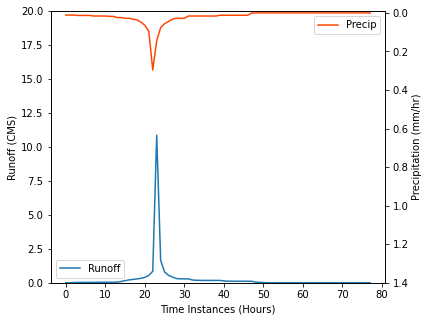

In [12]:
fig,ax1 = plt.subplots(figsize=(6,5))
line1 = ax1.plot(rpt_73461['Runoff (CFS)']); plt.ylim((-0.001,20)); plt.xlabel('Time Instances (Hours)'); plt.ylabel('Runoff (CMS)');
ax1.legend(['Runoff'],loc='lower left'); ax2 = ax1.twinx(); line2 = ax2.plot(rpt_73461['Precip (mm/hr)'],color='orangered');
plt.ylim((-0.01,1.4)); plt.ylabel('Precipitation (mm/hr)'); plt.gca().invert_yaxis(); ax2.grid(False); ax2.legend(['Precip'],loc='upper right');